In [1]:
import torch
from torch import nn
from torchvision import datasets,transforms
#load the training data
train_data=datasets.MNIST(root='data',train=True,download=True,transform=transforms.ToTensor())


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.12MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [2]:
test_data=datasets.MNIST(root='data',train=False,download=True,transform=transforms.ToTensor())

In [3]:
class_names=train_data.classes
print(class_names)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [4]:
class_to_idx=train_data.class_to_idx
print(class_to_idx)

{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


In [5]:
#first training label
image,label=train_data[0]
print(image.shape)
print(label)

torch.Size([1, 28, 28])
5


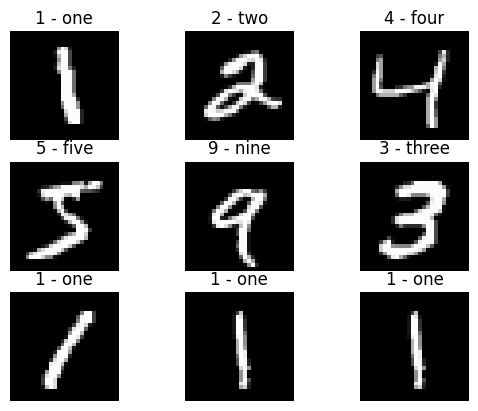

In [6]:
#plot the first 18 images in the training data
import matplotlib.pyplot as plt
for i in range(9):
  x=torch.randint(0,10,(1,)).item()
  image,label=train_data[x]
  plt.subplot(3,3,i+1)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)
plt.show()



In [7]:
#divide dataset into batches
from torch.utils.data import DataLoader
train_loader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(dataset=test_data,batch_size=32,shuffle=False)


In [8]:
#chek and whts inside the training data loader
train_features_batch,train_labels_batch=next(iter(train_loader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [9]:
#flattening
flatten_model=nn.Flatten()
x=train_features_batch
output=flatten_model(x)
print(output.squeeze().shape)

torch.Size([32, 784])


In [10]:
#linear model
from torch import nn
class MNISTModel(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)

    )
  def forward(self,x):
    return self.layer_stack(x)


In [11]:
#set up model with initial parameters
model0=MNISTModel(input_shape=784,hidden_units=10,output_shape=10)
model0

MNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [12]:
#set up and loss and optimizers
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [13]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc


In [14]:
def print_time(start,end):
  return end-start

In [16]:
#training and testing loops
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)
train_time_start=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  train_loss=0
  train_acc=0
  for batch,(image,label) in enumerate(train_loader):
    model0.train()
    y_pred=model0(image)
    loss=loss_fn(y_pred,label)
    train_loss+=loss.item()
    accuracy=accuracy_fn(y_true=label,y_pred=y_pred.argmax(dim=1))
    train_acc+=accuracy
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400==0:
      print(f"{batch*32}/{len(train_loader.dataset)}")
  train_loss/=len(train_loader)
  train_acc/=len(train_loader)
  test_loss,test_acc=0,0
  model0.eval()
  with torch.inference_mode():
    for image,label in test_loader:
      test_pred=model0(image)
      test_loss+=loss_fn(test_pred,label).item()
      test_acc+=accuracy_fn(y_true=label,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_loader)
    test_acc/=len(test_loader)
    print(f"test loss:{test_loss} test acc:{test_acc}")
train_time_end=timer()
train_time=print_time(start=train_time_start,end=train_time_end)
print(f"train_time:{train_time}")


  0%|          | 0/3 [00:00<?, ?it/s]

0/60000
12800/60000
25600/60000
38400/60000
51200/60000
test loss:0.28517380155795535 test acc:0.9189297124600639
0/60000
12800/60000
25600/60000
38400/60000
51200/60000
test loss:0.2818695168537549 test acc:0.9214257188498403
0/60000
12800/60000
25600/60000
38400/60000
51200/60000
test loss:0.28335858472941305 test acc:0.9199281150159745
train_time:35.62529998399987
